<h2 style="text-align: center"><i>The Interaction Between Two Atoms</i></h2>

**Author:** 2023WS_61714

**Date:** November 22, 2023

---

**Goal:** 
The Goal is to apply scientific computing knowledge by extending previous work on the Lennard-Jones equation [[1]](#1), implementing <br /> an alternative equation for nonbonded interactions, and exploring the Pandas library [[3]](#3) for data manipulation and analysis.

<div style="text-align: center">

<a id="lje">
<h4>Lennard-Jones Equation:</h4>
</a>

</div>

<div style="text-align: center">

#### $V_{LJ}(r) = 4\varepsilon \ \left[\left(\frac {\sigma} {r}\right)^{12} -\left(\frac {\sigma} {r}\right)^{6} \right]$

</div>

<div style="text-align: center">

<a id="eee">
<h4>Yang et al.'s Expanded Exponential Equation: </h4>
</a>

</div>

<div style="text-align: center">

#### $$V_{Exp}(r)=\varepsilon \left[  e^{\alpha (1-\frac{r}{\sigma})} - \left( \left(\frac{r}{\sigma} \right)^4 - 2 \left(\frac{r}{\sigma} \right)^2 + 3\right) e^{(\frac{\alpha}{2})(1-\frac{r}{\sigma})}  \right]$$

</div>

---

**References**

<a id="1">[1]</a> Lennard-Jones Equation: https://en.wikipedia.org/wiki/Lennard-Jones_potential.
<br />
<a id="2">[2]</a> Hartree to kj/mol: http://wild.life.nctu.edu.tw/class/common/energy-unit-conv-table.html
<br />
<a id="3">[3]</a> Pandas: Python Data Analysis Library: https://johnfoster.pge.utexas.edu/numerical-methods-book/ScientificPython_Pandas.html
<br />
<a id="4">[4]</a> extended exponential Equation from Yang et al: [van der Waals Function for Molecular Mechanics](../docs/YangSD2020.pdf)

**Import**

Let's import the essential libraries needed for the assignment: `pandas` and `numpy`. <br />So that we can use them later in the code blocks.

In [13]:
import pandas as pd
import numpy as np

---

<h3> Task 1: </h3>

We need utilize `Pandas` to load the $QM$ target data for $Ar_2$ from the file ([CybulskiT1999_Ar2.csv](CybulskiT1999_Ar2.csv)), making sure to **eliminate duplicates** and **missing rows**. <br /> 
After that, we need to **convert the numbers** in the potential energy column $V_{QM}(r)$ **(Hartree) to kJ/mol** [[2]](#2).

In [14]:
dataset = pd.read_csv('../docs/CybulskiT1999_Ar2.csv', sep=";")
dataset.rename(columns={"V(r) (Hartree)": "$V_{QM}(r)$ (Hartree)"}, inplace=True)
dataset

,R (Å),$V_{QM}(r)$ (Hartree)
0,3.000,0.003055
1,3.250,0.000518
2,3.500,-0.000279
3,3.500,-0.000279
4,3.600,NaN
5,3.750,-0.000441
6,3.775,-0.000442
7,3.800,-0.000441
8,3.850,-0.000436
9,3.950,NaN


We can use the `Pandas` [[3]](#3) `.drop_duplicates()` function to **eliminate duplicate entries** in our data frame. <br /> Additionally, the `.dropna()` function allows us to **remove missing or NaN values**

In [15]:
dataset = dataset.drop_duplicates()
dataset = dataset.dropna()
dataset

,R (Å),$V_{QM}(r)$ (Hartree)
0,3.000,0.003055
1,3.250,0.000518
2,3.500,-0.000279
5,3.750,-0.000441
6,3.775,-0.000442
7,3.800,-0.000441
8,3.850,-0.000436
10,4.000,-0.000400
11,4.250,-0.000313
12,4.500,-0.000232


Now, we convert the values **from Hartree to kJ/mol** [[2]](#2) by multiplying the values with `2625.5`.

In [16]:
dataset['$V_{QM}(r)$ (kJ/mol)'] = dataset['$V_{QM}(r)$ (Hartree)'] * 2625.5
dataset

,R (Å),$V_{QM}(r)$ (Hartree),$V_{QM}(r)$ (kJ/mol)
0,3.000,0.003055,8.020850
1,3.250,0.000518,1.360298
2,3.500,-0.000279,-0.732462
5,3.750,-0.000441,-1.157373
6,3.775,-0.000442,-1.160130
7,3.800,-0.000441,-1.158686
8,3.850,-0.000436,-1.145269
10,4.000,-0.000400,-1.049150
11,4.250,-0.000313,-0.822097
12,4.500,-0.000232,-0.609904


---

<h3> Task 2: </h3>

In the task we have to calculate the **Lennard-Jones potential energy** [Eq. 1](#lje) and the <br /> **exponential potential energy** [Eq. 2](#eee) using the distances given in the $QM$ target data.

<center> These specific Argon atom parameters have been provided in the assignment paper: </center>

<center>

| $Species$            | $\epsilon (kJ/mol)$ | $\sigma (Å)$ | $α$   |
| ------------------ | -------------------- | ------------ | ----- |
| $Ar_2$             | 1.178                | 3.75         | 13.18 |

</center>

We will assign these values in a separate code block so that we can use them later

In [17]:
epsilon = 1.178 # kJ/mol
sigma = 3.75 #Å
alpha = 13.18

To calculate the non-bonded potential energy between two atoms, <br /> we use the Lennard-Jones equation [[1]](#1), which is represented by the following Python function:

In [18]:
def lennard_jones_eq(r:float, epsilon:float, sigma:float):
    return (4 * epsilon * (((sigma / r) ** 12) - ((sigma / r) ** 6)))

Next, we apply the `lennard_jones_eq()` function to the **R (Å)** column in the dataframe, <br/> using pandas' built-in function `.apply()` [[3]](#3). Additionally, we add a new column titled: **$V_{LJ}(r)$ (kJ/mol) (kJ/mol)** to showcase the values.

In [19]:
dataset['$V_{LJ}(r)$ (kJ/mol)'] = dataset.apply(lambda row: lennard_jones_eq(r=row['R (Å)'], 
epsilon=epsilon, sigma=sigma), axis=1)
dataset

,R (Å),$V_{QM}(r)$ (Hartree),$V_{QM}(r)$ (kJ/mol),$V_{LJ}(r)$ (kJ/mol)
0,3.000,0.003055,8.020850,50.593771
1,3.250,0.000518,1.360298,15.121296
2,3.500,-0.000279,-0.732462,3.655327
5,3.750,-0.000441,-1.157373,0.000000
6,3.775,-0.000442,-1.160130,-0.176962
7,3.800,-0.000441,-1.158686,-0.332475
8,3.850,-0.000436,-1.145269,-0.587738
10,4.000,-0.000400,-1.049150,-1.027134
11,4.250,-0.000313,-0.822097,-1.174281
12,4.500,-0.000232,-0.609904,-1.049557


To compute potential energy using the **extended exponential Equation from Yang et al** $V_{Exp}(r)$ [[4]](#4), we use the `.exp()` function of the numpy library in Python.

In [20]:
def expanded_exponential_eq(r, epsilon, sigma, alpha):
    term1 = epsilon * (np.exp(alpha * (1 - r / sigma)))
    term2 = ((r / sigma) ** 4 - 2 * (r / sigma) ** 2 + 3) * np.exp(0.5 * alpha * (1 - r / sigma))
    return term1 - term2

The function `expanded_exponential_eq` employs the specified formula.

Ultimately, the `expanded_exponential_eq()` function is applied to the r (Å) column within the dataframe using, `.apply()` [[3]](#3) again. <br />Additionally, we add a new column titled: **$V_{LJ}(r)$ (kJ/mol) (kJ/mol)** to showcase the values.

In [21]:
dataset['$V_{Exp}(r)$ (kJ/mol)'] = dataset.apply(lambda row: expanded_exponential_eq(r=row['R (Å)'],
epsilon=epsilon, sigma=sigma, alpha=alpha), axis=1)
dataset

,R (Å),$V_{QM}(r)$ (Hartree),$V_{QM}(r)$ (kJ/mol),$V_{LJ}(r)$ (kJ/mol),$V_{Exp}(r)$ (kJ/mol)
0,3.000,0.003055,8.020850,50.593771,8.485593
1,3.250,0.000518,1.360298,15.121296,1.864296
2,3.500,-0.000279,-0.732462,3.655327,-0.292866
5,3.750,-0.000441,-1.157373,0.000000,-0.822000
6,3.775,-0.000442,-1.160130,-0.176962,-0.835297
7,3.800,-0.000441,-1.158686,-0.332475,-0.844271
8,3.850,-0.000436,-1.145269,-0.587738,-0.851227
10,4.000,-0.000400,-1.049150,-1.027134,-0.811899
11,4.250,-0.000313,-0.822097,-1.174281,-0.661067
12,4.500,-0.000232,-0.609904,-1.049557,-0.502761


---

<h3> Task 3: </h3>

Let's make a graph with `.plot()` from the Pandas library [[3]](#3). We'll put distances **(R (Å))** on the x-axis and show three energies ($QM$ target, $V_{LJ}(r)$ using [Eq. 1](#lje), <br /> and  using $V_{Exp}(r)$ [Eq. 2](#eee)) on the y-axis. This will help us see how these energies shift with different particle distances.

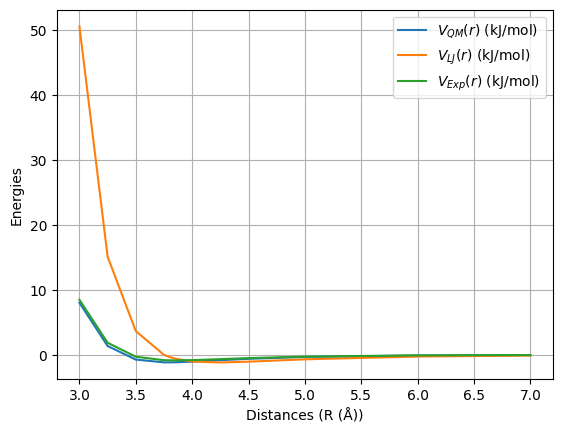

In [22]:
data_graph = pd.DataFrame(dataset)

data_graph.plot(kind="line", x='R (Å)', y=['$V_{QM}(r)$ (kJ/mol)', '$V_{LJ}(r)$ (kJ/mol)', '$V_{Exp}(r)$ (kJ/mol)'],
                  xlabel='Distances (R (Å))', ylabel='Energies', grid=True);

<h3> Task 4: </h3>

We need to saving the distances, $V_{QM}(r)$ in (Hartree) and (kJ/mol), $V_{LJ}(r)$, $V_{Exp}(r)$ <br /> energies in (kJ/mol) to a **CSV-formatted file**. This file specifically holds this essential dataset.

Now, we use the `.concat()` function in `Pandas` [[3]](#3) to combine DataFrames along their columns (`axis=1`).

In [23]:
dataset_save = pd.concat([dataset['R (Å)'], dataset['$V_{QM}(r)$ (Hartree)'], dataset['$V_{QM}(r)$ (kJ/mol)'], 
                             dataset['$V_{LJ}(r)$ (kJ/mol)'], 
                             dataset['$V_{Exp}(r)$ (kJ/mol)']], axis=1)

Afterwards, we use the built-in `pandas` function `.to_csv()` [[3]](#3) to **store** the file in a `.csv` data format.

In [24]:
dataset_save.to_csv('../docs/QM_LJ_Exponential_Energies.csv')